In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt3
import numpy as np


In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input (adding a channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical (one-hot encoding is not needed for sparse_categorical_crossentropy)


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.9125 - loss: 0.2859 - val_accuracy: 0.9831 - val_loss: 0.0501
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.9855 - loss: 0.0481 - val_accuracy: 0.9906 - val_loss: 0.0330
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.9910 - loss: 0.0309 - val_accuracy: 0.9890 - val_loss: 0.0328
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9924 - loss: 0.0242 - val_accuracy: 0.9903 - val_loss: 0.0312
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9949 - loss: 0.0162 - val_accuracy: 0.9894 - val_loss: 0.0347


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


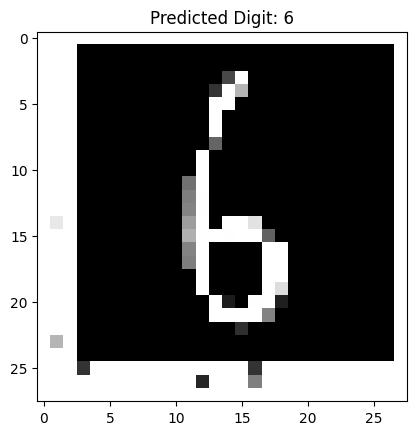

np.int64(6)

In [ ]:
tfrom tensorflow.keras.preprocessing import image

def predict_digit(img_path):
    img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")  # Load image
    img = np.array(img) / 255.0  # Normalize
    img = img.reshape(1, 28, 28, 1)  # Reshape for model input

    prediction = model.predict(img)  # Get model predictions
    digit = np.argmax(prediction)  # Get highest probability digit

    plt.imshow(img.reshape(28,28), cmap="gray")
    plt.title(f"Predicted Digit: {digit}")
    plt.show()

    return digit

# Example Usage
predict_digit("mnist_image6.jpg")  # Replace with your own image path
